In [2]:
import json
import requests
import pandas as pd
import folium
from folium import plugins
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import urllib  
resale = pd.read_csv('clean_HDBresale2020.csv')

FileNotFoundError: [Errno 2] File b'clean_HDBresale2020.csv' does not exist: b'clean_HDBresale2020.csv'

# Correlation of Resale Price v Numerical Variables

In [17]:
resale.corr()

,Unnamed: 0,floor_area_sqm,resale_price,lease_commence_date,_id,latitude,longitude
Unnamed: 0,1.000000,-0.013764,-0.025423,0.096796,0.999949,0.031988,0.005570
floor_area_sqm,-0.013764,1.000000,0.633208,0.189463,-0.013865,0.122164,0.029560
resale_price,-0.025423,0.633208,1.000000,0.326791,-0.025483,-0.132284,0.010471
lease_commence_date,0.096796,0.189463,0.326791,1.000000,0.096750,0.234187,0.042992
_id,0.999949,-0.013865,-0.025483,0.096750,1.000000,0.031986,0.005581
latitude,0.031988,0.122164,-0.132284,0.234187,0.031986,1.000000,0.835126
longitude,0.005570,0.029560,0.010471,0.042992,0.005581,0.835126,1.000000


## Obtaining the integer value of Remaining Lease Years & Resale Price per sqm

In [74]:
num_remaining_lease = resale['remaining_lease'].str[0:2].astype(int) #getting the no. of remaining years of lease then convert to int
resale['No. of remaining lease'] = num_remaining_lease #add new column 'num remaining lease'
price_persqm = resale['resale_price'] / resale['floor_area_sqm'] #find resale value/ floor_area_sqm
resale['price_persqm'] = price_persqm #add new column 'pricepersqm'


## Plotting the median resale price per sqm of each remaining no. of lease years (interval of 5 years between them)

Text(0.5, 1.0, 'Median Resale Price per sqm against Remaining No. of Years on Lease')

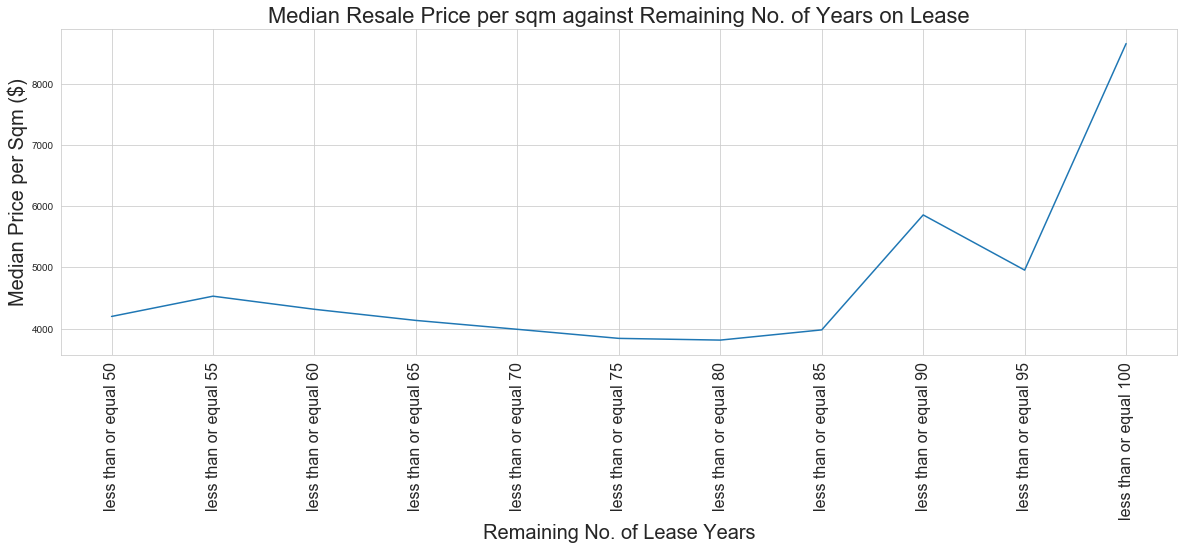

In [70]:
bins = np.arange(45,105,5)
years = ['less than or equal 50', 'less than or equal 55','less than or equal 60','less than or equal 65',
         'less than or equal 70','less than or equal 75','less than or equal 80','less than or equal 85',
         'less than or equal 90','less than or equal 95','less than or equal 100'
        ]
resale['years_interval'] = pd.cut(resale['No. of remaining lease'], bins, labels = years)

grp = resale.groupby(by = resale['years_interval'])
ret = grp.aggregate(np.median)
fig_dims = (20, 6)
fig, ax = plt.subplots(figsize=fig_dims)
ax = sns.lineplot(years,'price_persqm', data=ret, sort = False)
plt.xticks(rotation = 'vertical', fontsize = 16)
plt.xlabel("Remaining No. of Lease Years", fontsize = 20)
plt.ylabel("Median Price per Sqm ($)", fontsize = 20)
plt.title("Median Resale Price per sqm against Remaining No. of Years on Lease", fontsize = 22)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10]),
 <a list of 11 Text xticklabel objects>)

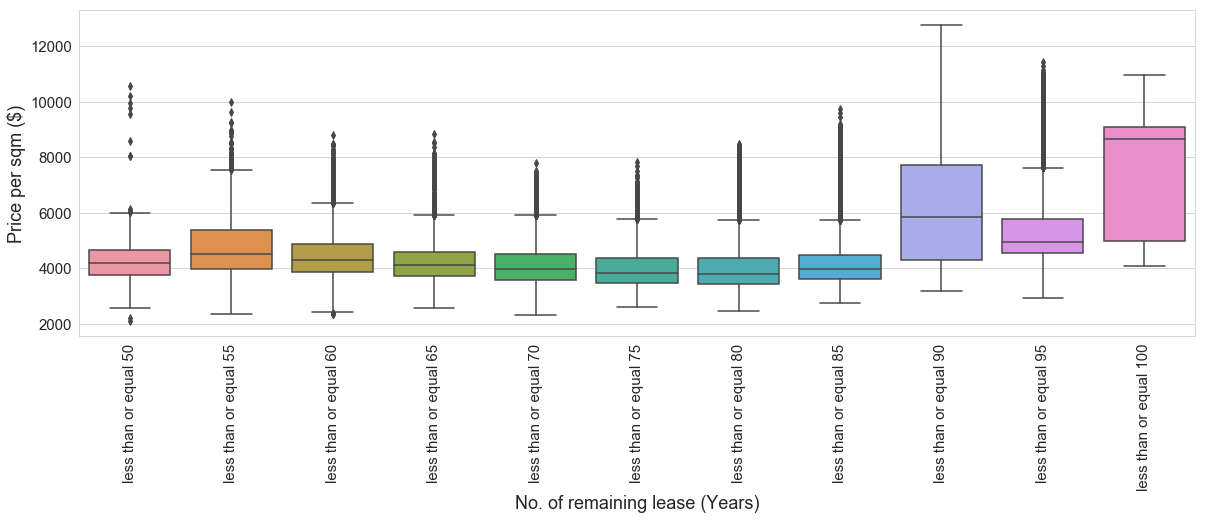

In [72]:
import seaborn as sns
sns.set_style("whitegrid")
fig_dims = (20, 6)
fig, ax = plt.subplots(figsize=fig_dims)
ax = sns.boxplot(x="years_interval", y= "price_persqm", data= resale)
plt.xlabel("""No. of remaining lease (Years)""", fontsize = 18)
plt.ylabel("""Price per sqm ($)""", fontsize = 18)
plt.yticks(fontsize = 15)
plt.xticks(rotation = 'vertical', fontsize = 15)

## Boxplot of Flat models vs Price per sqm

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19]), <a list of 20 Text xticklabel objects>)

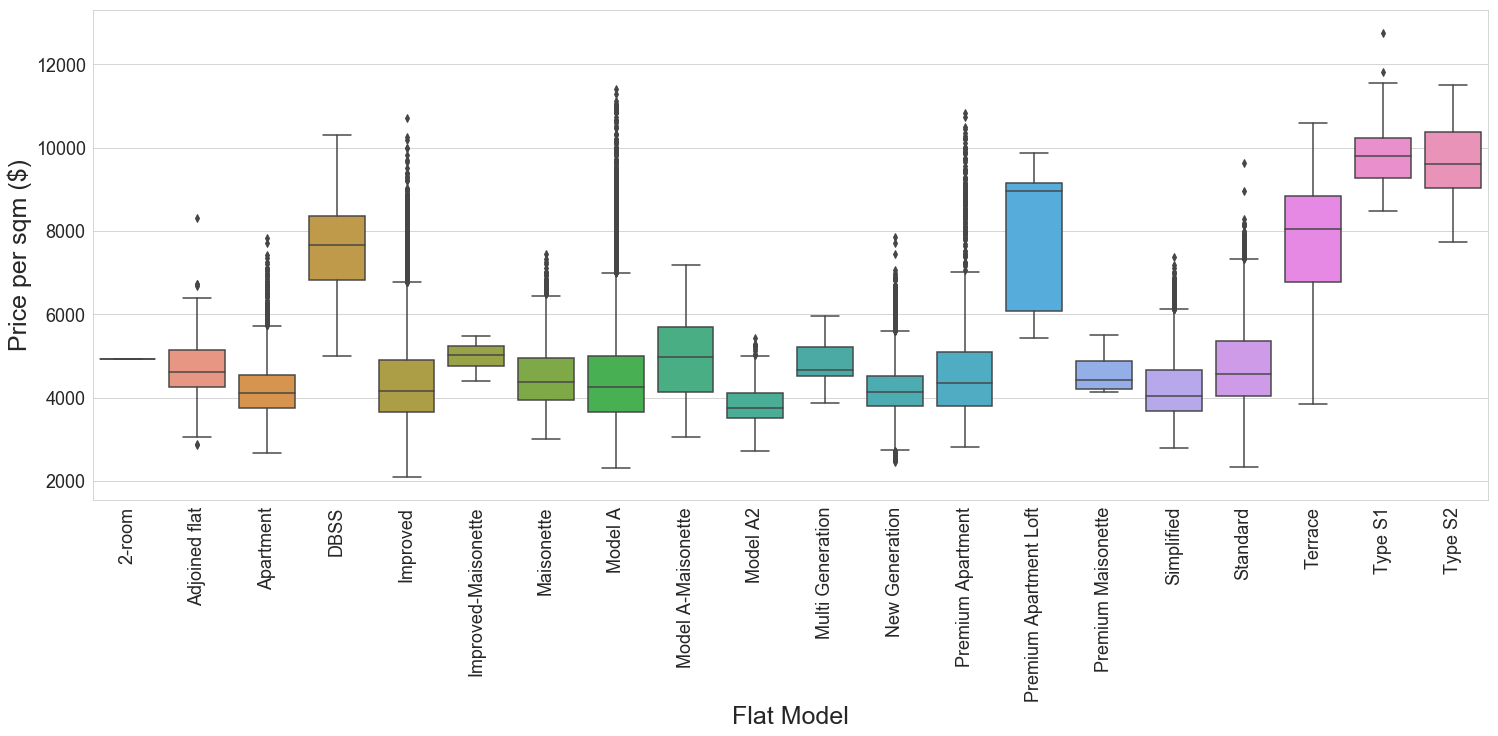

In [84]:
sort_model = sorted(resale['flat_model'].unique())

sns.set_style("whitegrid")
fig_dims = (25, 9)
fig, ax = plt.subplots(figsize=fig_dims)
ax = sns.boxplot(x="flat_model", y= "price_persqm", data= resale, order = sort_model )
plt.xlabel("""Flat Model""", fontsize = 25)
plt.ylabel("""Price per sqm ($)""", fontsize = 25)
plt.yticks(fontsize = 18)
plt.xticks(rotation = 'vertical', fontsize = 18)

Text(0.5, 1.0, ' ')

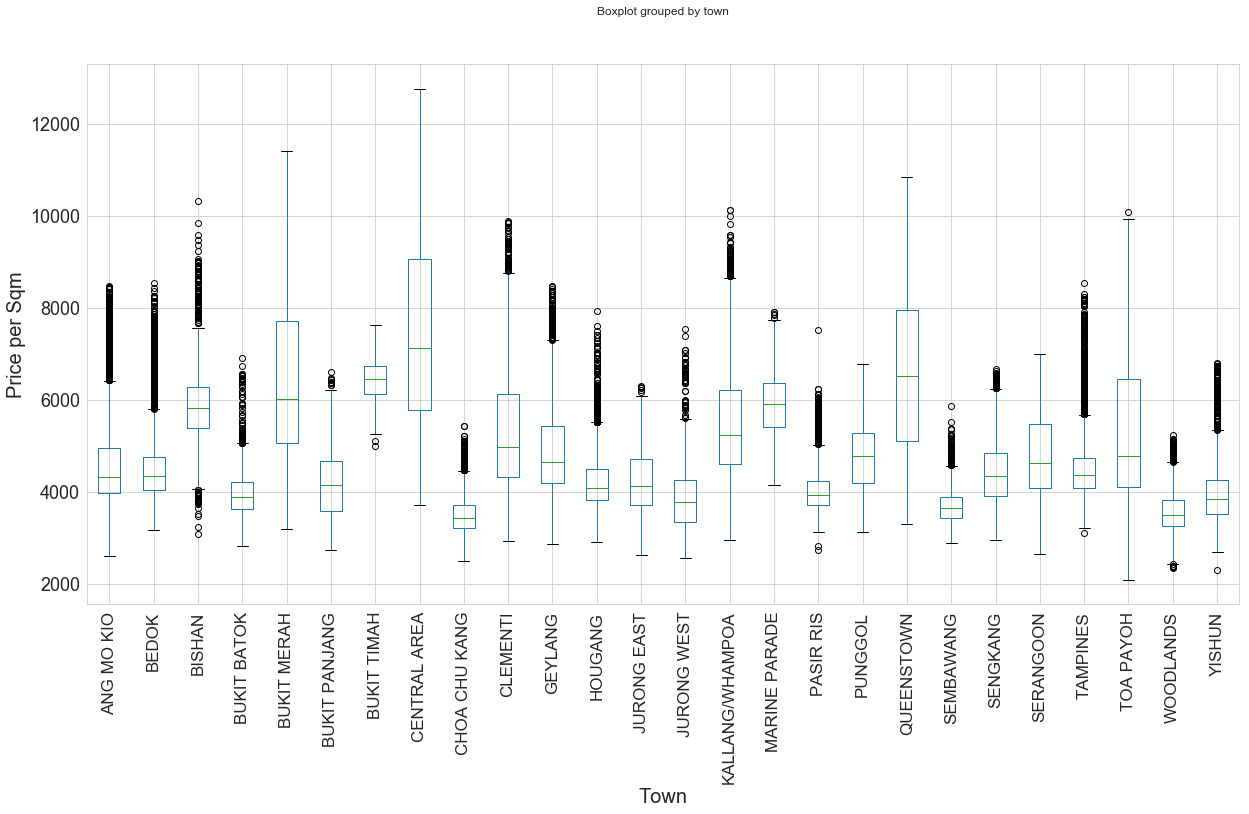

In [26]:
resale['town'].unique()

resale.boxplot(column = 'price_persqm', by = 'town', figsize=(20,10), fontsize = 18)
plt.xlabel('Town', fontsize = 20)
plt.xticks(rotation = 'vertical', fontsize = 17)
plt.ylabel('Price per Sqm', fontsize = 20)
plt.title(' ')

Text(0, 0.5, 'Price per sqm ')

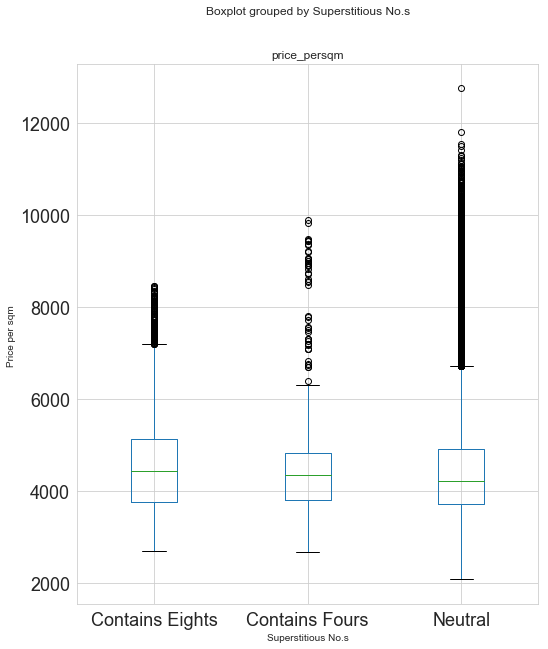

In [27]:

fours = resale['block'].str.contains('44') 
eights = resale['block'].str.contains('88')
resale["Superstitious No.s"] = 'Neutral'
resale.loc[fours, 'Superstitious No.s'] = 'Contains Fours'
resale.loc[eights, 'Superstitious No.s'] = 'Contains Eights'

resale.boxplot(column = 'price_persqm', by = 'Superstitious No.s', figsize = (8,10), fontsize = 18)
plt.ylabel("Price per sqm ")

NameError: name 'resale' is not defined